### Кодирование категориальных признаков

In [294]:
# импортируем необходимые пакеты

import pandas as pd
import seaborn as sns
import statistics
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [295]:
data = pd.read_csv('data/wine_cleared.csv') # чтение данных

In [189]:
display(data.describe(include=['object']))

,country,description,designation,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,129971,129908,129971,129971,129971,129971,129970,129971
unique,43,119955,37980,425,1230,20,16,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",unknown,California,unknown,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,37465,36247,21247,26244,31213,11,13272,222


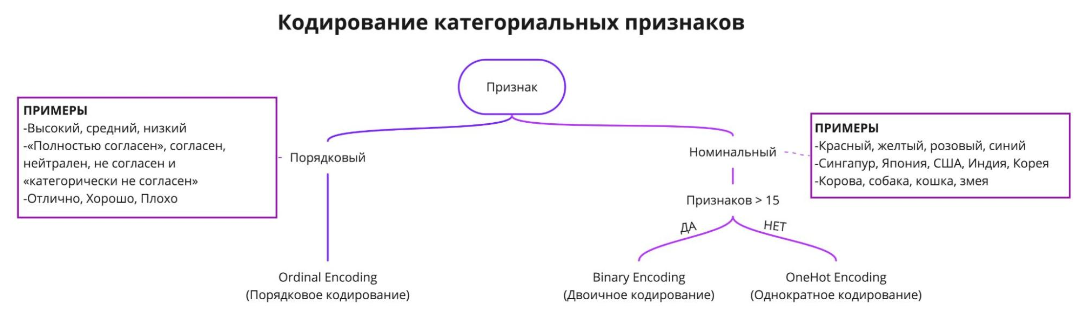

In [222]:
import category_encoders as ce

In [250]:
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


#### 1.1. Порядковое кодирование (Ordinal encoding)

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Данные должны быть отсортированы по возрастанию категориального признака.

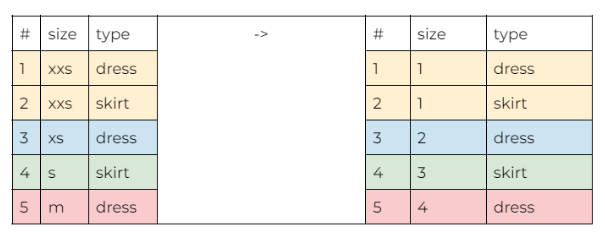

In [251]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(clothing[['size']])
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [231]:
ord_encoder = ce.OrdinalEncoder()
data.sort_values('year')
data_bin = ord_encoder.fit_transform(data['year'])
data = pd.concat([data, data_bin], axis=1)

#### Однократное кодирование (One-hot encoding)

Для каждой новой категории создается новый бинарный признак. Значение 1 в этих признаках проставляется там, где значение исходного признака равно этой категории

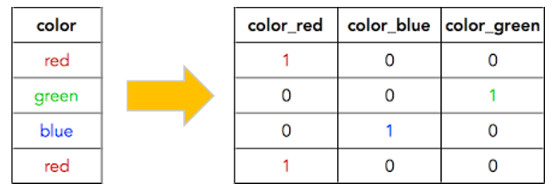

In [252]:
encoder = ce.OneHotEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing_dummies = pd.concat([clothing, type_bin], axis=1)

clothing_dummies

,size,type,size,type_1,type_2,type_3,type_4
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [253]:
# аналогично:
clothing = pd.get_dummies(clothing, columns=['type'])
clothing

,size,size,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,0,1,0,0
1,xxs,1,0,0,0,1
2,xs,2,0,1,0,0
3,s,3,0,0,0,1
4,m,4,0,1,0,0
5,l,5,0,0,1,0
6,s,3,1,0,0,0
7,m,4,1,0,0,0
8,xxl,6,0,0,1,0
9,l,5,0,1,0,0


In [243]:
data = pd.get_dummies(data, columns=['taster_name'])

#### Двоичное кодирование (Binary encoding)

Принцип двоичного кодирования похож на однократное кодирование, но создаёт меньше столбцов. При однократном кодировании признака с количеством уникальных категорий 100 шт. мы создадим 100 новых признаков, а при двоичном кодирования мы сгенерируем всего 7 признаков.

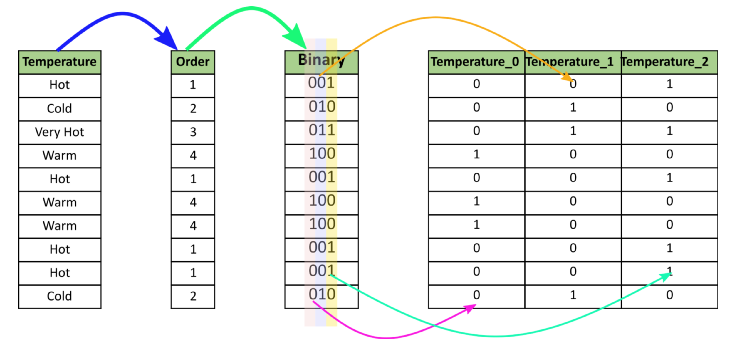

Пошаговый алгоритм двоичного кодирования можно описать так: 

* значения признака кодируются в некоторый числовой порядок;
* целые числа кодируются в двоичный код;
* цифры двоичного представления формируют новые столбцы.

In [255]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)

In [256]:
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)